In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [198]:
globalTemperature = pd.read_csv("/content/drive/MyDrive/archive_climate/GlobalTemperatures.csv")

globalTemperature.shape

(3192, 9)

In [199]:
globalTemperature.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

dt: começa em 1750 para a temperatura média da terra e 1850 para as temperaturas máximas e mínimas da terra e temperaturas globais do oceano e da terra

LandAverageTemperature: temperatura média global da terra em celsius

LandAverageTemperatureUncertainty: o intervalo de confiança de 95% em torno da média

LandMaxTemperature: temperatura média global máxima da terra em celsius

LandMaxTemperatureUncertainty: o intervalo de confiança de 95% em torno da temperatura máxima da terra

LandMinTemperature: temperatura terrestre média global mínima em celsius

LandMinTemperatureUncertainty: o intervalo de confiança de 95% em torno da temperatura mínima da terra

LandAndOceanAverageTemperature: temperatura média global da terra e do oceano em celsius

LandAndOceanAverageTemperatureUncertainty: o intervalo de confiança de 95% em torno da temperatura média global da terra e do oceano

In [200]:
globalTemperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [201]:
globalTemperature.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [202]:
def wrangle(df):
  df = df.copy()

  df = df.drop(columns = ['LandAverageTemperatureUncertainty', 'LandMaxTemperatureUncertainty', 
                          'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperatureUncertainty'], axis=1)
  
  df["dt"] = pd.to_datetime(df["dt"])

  df["Month"] = df["dt"].dt.month

  df["Year"] = df["dt"].dt.year

  df = df.drop("dt", axis = 1)
  df = df.drop("Month", axis = 1)
  df = df[df.Year >= 1850]

  df = df.set_index(["Year"]) 

  df = df.dropna()

  return df


In [203]:
globalTemperatureFormated = wrangle(globalTemperature)  

In [204]:
globalTemperatureFormated.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,0.749,8.242,-3.206,12.833
1850,3.071,9.970,-2.291,13.588
1850,4.954,10.347,-1.905,14.043
1850,7.217,12.934,1.018,14.667
1850,10.004,15.655,3.811,15.507


In [205]:
globalTemperatureFormated.isnull().sum()

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

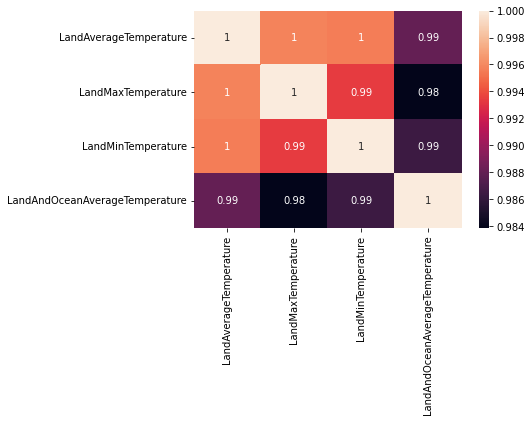

In [206]:
corrMatrix = globalTemperatureFormated.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [207]:
target = 'LandAndOceanAverageTemperature'

Y = globalTemperatureFormated[target]

X = globalTemperatureFormated[['LandAverageTemperature', 
                              'LandMaxTemperature',
                              'LandMinTemperature' 
                              ]]


In [208]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [209]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(1334, 3)
(658, 3)
(1334,)
(658,)


In [210]:
y_pred = [y_train.mean() * len(y_train)]

print("Baseline MAE:", round(mean_absolute_error(y_train, y_pred), 5))

ValueError: ignored

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

lm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])